In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# defining the limit of dataset

df = pd.read_csv("Weather_Dataset.csv", nrows=5000)

In [3]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
4995,4996,2013,9,25,3,3.0,29.0,2.0,59.0,200.0,2.0,7.4,1017.2,5.9,0.0,N,0.5,Aotizhongxin
4996,4997,2013,9,25,4,9.0,45.0,4.0,64.0,200.0,1.0,6.6,1017.3,5.5,0.0,WSW,0.7,Aotizhongxin
4997,4998,2013,9,25,5,10.0,36.0,12.0,52.0,300.0,1.0,6.3,1017.5,5.7,0.0,ESE,0.0,Aotizhongxin
4998,4999,2013,9,25,6,7.0,7.0,9.0,61.0,300.0,1.0,6.6,1017.9,5.9,0.0,W,0.0,Aotizhongxin
4999,5000,2013,9,25,7,12.0,44.0,10.0,61.0,400.0,1.0,13.0,1018.1,4.9,0.0,E,0.9,Aotizhongxin


In [5]:
# Dropping the unnecessary columns

df = df.drop(['No', 'wd', 'station'], axis=1)

In [6]:
# Checking the heads 

df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [7]:
# Checking the shape of the dataset

df.shape

(5000, 15)

In [8]:
# Checking is there any null value

df.isnull().any().any()

True

In [9]:
# Filling the NA values

df.fillna(method = 'ffill', inplace = True)

#df_new = df[np.isfinite(df).all(1)]

In [10]:
#df_new.isnull().any().any()

In [11]:
# Grabbing the values Hours & NO2

#data = df_new.iloc[:,[3,7]].values

data = df.iloc[:,[3,7]].values

In [12]:
# Checking the dataset size

data.shape

(5000, 2)

In [13]:
# importing nearest neighbours library

from sklearn.neighbors import NearestNeighbors

In [14]:
neighbors = NearestNeighbors(n_neighbors = 5)

In [15]:
nbrs = neighbors.fit(data)

In [16]:
distances,indices = nbrs.kneighbors(data)

In [17]:
distances = np.sort(distances, axis = 0)

In [18]:
distances = distances[:, 1]

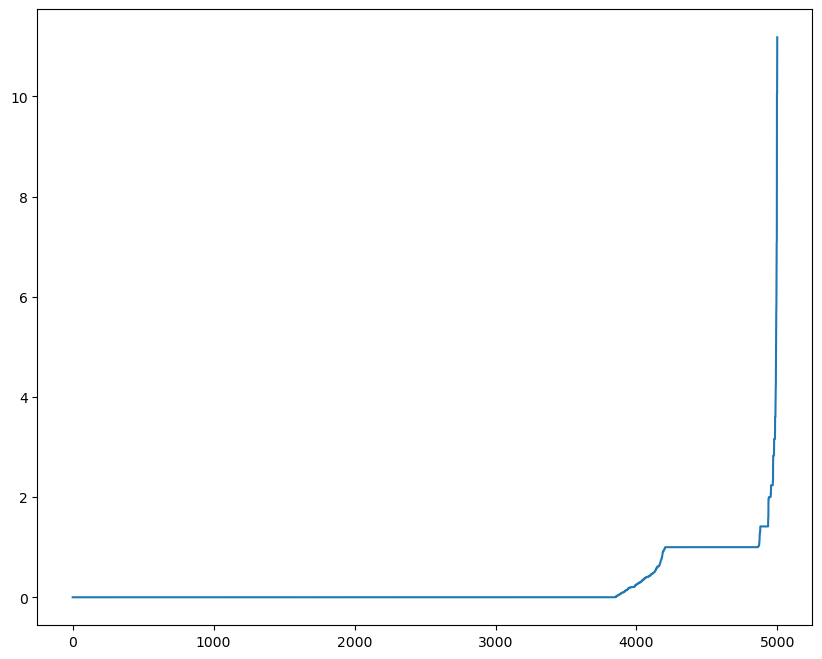

In [19]:
# Checking the epsilon value to put in DBSCAN Algo

plt.rcParams['figure.figsize'] = (10,8)
plt.plot(distances)
plt.show()

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
dbscan = DBSCAN(eps = 3, min_samples = 4).fit(data)

In [22]:
labels = dbscan.labels_

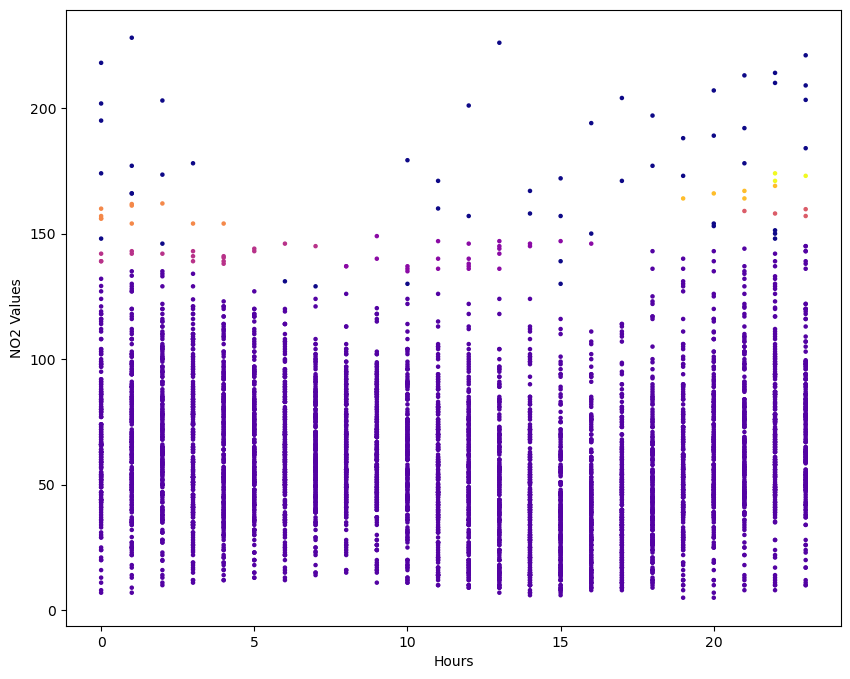

In [23]:
#Plotting The Graph from the dataset

plt.scatter(data[:, 0], data[:, 1],s=5, c = labels, cmap = 'plasma')
plt.xlabel("Hours")
plt.ylabel("NO2 Values")
plt.show()

In [24]:
# Checking the amount of Cluster and Noise in the taken dataframe

num_clusters = len(set(labels))-(1 if -1 in labels else 0)
num_noise = list(labels).count(-1)

print("Number of Clusters: ", num_clusters)
print("Number of Noise: ", num_noise)

Number of Clusters:  7
Number of Noise:  52


In [25]:
#cheking the array of unique labels

np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

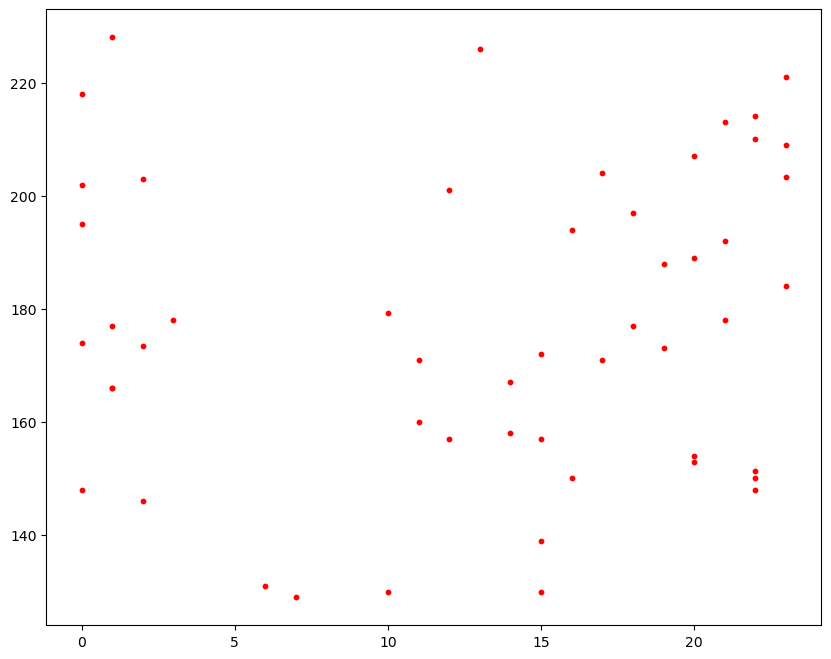

In [26]:
# Plotting the noise points in the Graph

plt.scatter(data[labels == -1,0], data[labels == -1,1], s=10, c="red")

In [27]:
#Printing the rows where the noise is present

noise = np.where(labels == -1)
print(noise)

(array([ 110,  111,  112,  113,  114,  115,  116,  117,  119,  120,  121,
        122,  126,  127,  135,  137,  138,  140,  142,  155,  156,  157,
        158,  159,  163,  164,  165,  166,  167,  168,  169,  178,  179,
        183,  352, 2017, 2278, 2279, 2280, 2281, 2282, 2283, 2517, 2564,
       2566, 2666, 2854, 2855, 2856, 4248, 4690, 4692], dtype=int64),)


In [28]:
df.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

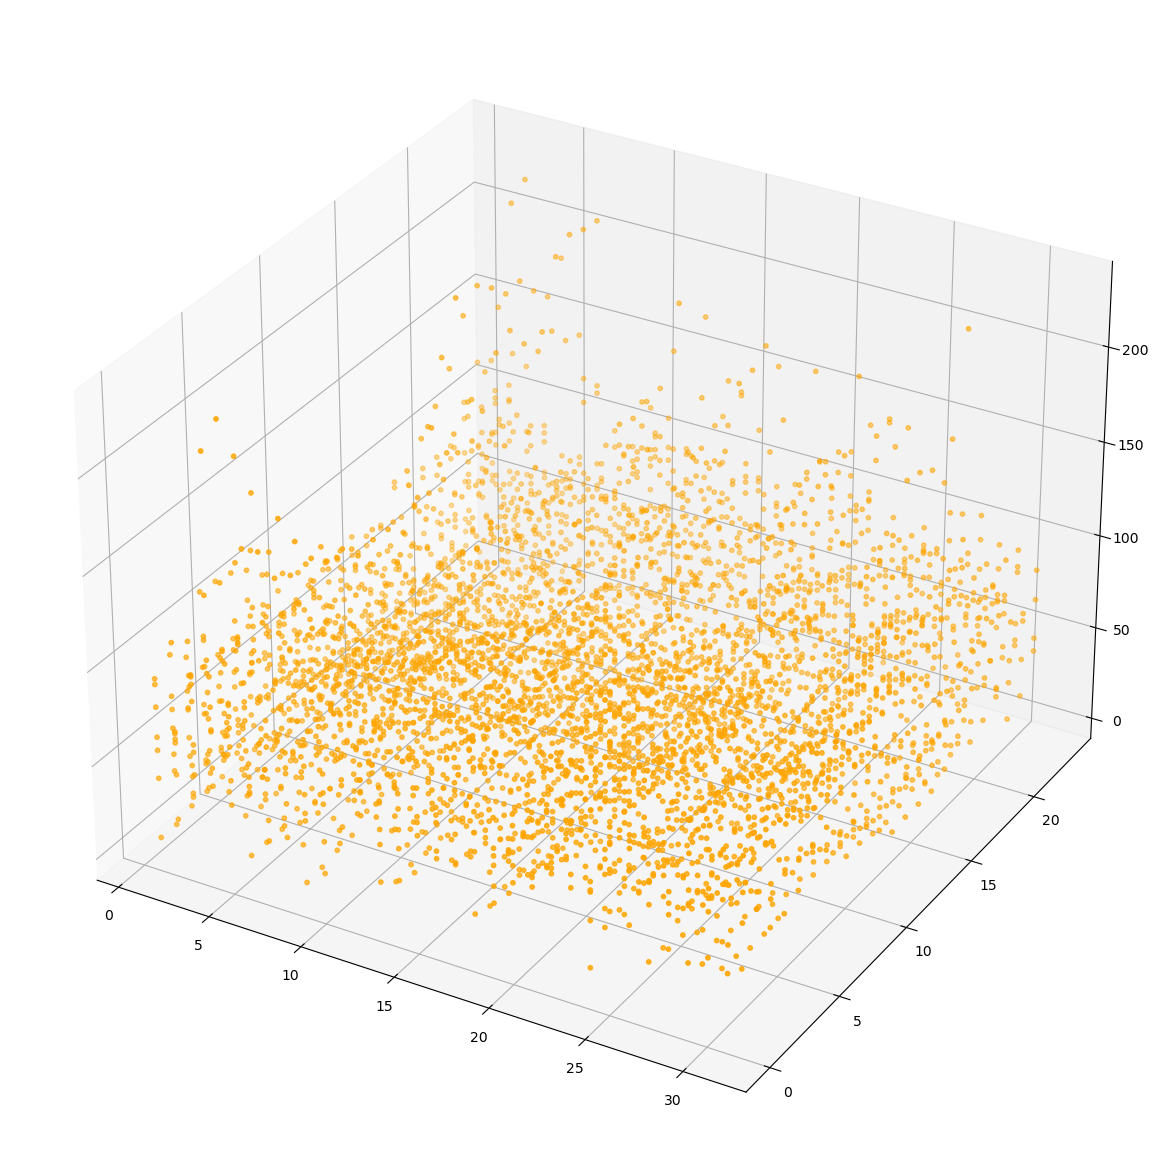

In [29]:
# 3D plot of Day, Hour, NO2

plt.figure(figsize=(20,15))
ax = plt.axes(projection = '3d')
fg = ax.scatter3D(df['day'], df['hour'], df['NO2'], s=10, c='orange')